# **Codveda Technologies Internship For ML**

# Task 1: Logistic Regression for Binary Classification

**Intern**-Muhammad Sakibur Rahaman

**Dataset**-Churn-bigml(80)

**Objectives**:

* Load and preprocess the dataset.
* Train a logistic regression model using scikit-learn.
* Interpret model coefficients and the odds ratio.
Evaluate the model using metrics such as accuracy,
precision, recall, and the ROC curve.
* Tools: Python, pandas, scikit-learn, matplotlib.

**Description**: Implement a logistic regression model to
predict binary outcomes (e.g., whether a customer
will churn).


---



# 1. Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.Import the relevant libraries

In [2]:
#python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,recall_score,precision_score,roc_auc_score,roc_curve #Evaluate
from sklearn.preprocessing import LabelEncoder #Preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

# 3.Load Dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/churn-bigml-80.csv')

# 4.Head of dataset

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 5.Shape of dataset

In [5]:
df.shape

(2666, 20)

# 6.Drop the column 'Area code'

In [6]:
df.drop('Area code',axis=1,inplace=True) #drop'Area code'

* Drop column 'Area code' cause it's not important

# 7.Distribution plot

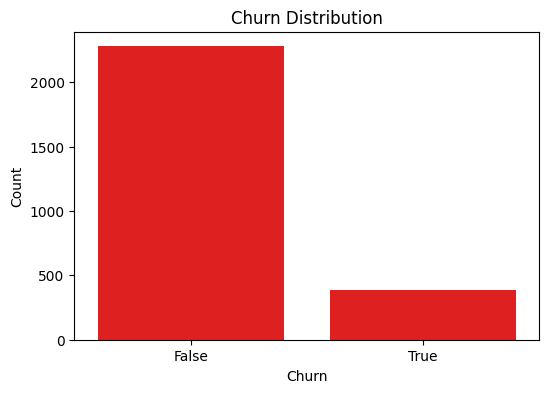


Churn Value Counts:
Churn
False    2278
True      388
Name: count, dtype: int64


In [7]:
#Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df,color='red')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

print("\nChurn Value Counts:")
print(df['Churn'].value_counts())


* Dataset look's imbalance

# 8.churend & retained finding

In [8]:
churned= df[df.Churn=='True'].shape[0]  # Use boolean True instead of string 'True'
retained= df[df.Churn=='False'].shape[0]  # Use boolean True instead of string 'False'

# Check if churned + retained is zero before dividing to avoid the error
if churned + retained != 0:
  ch_per =((churned/(churned+retained))*100)
  re_per =((retained/(churned+retained))*100)
  print(ch_per)
  print(re_per)
else:
  print("Error: No churend or retained customers found.")

Error: No churend or retained customers found.


# 9.Check Null Values of Dataset

In [9]:
df.isnull().sum()

,0
State,0
Account length,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0
Total eve calls,0


* Here is no null values

# 10.Describe the Dataset

In [10]:
df.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 11.countplot visualizaion

,count
International plan,
No,2396
Yes,270


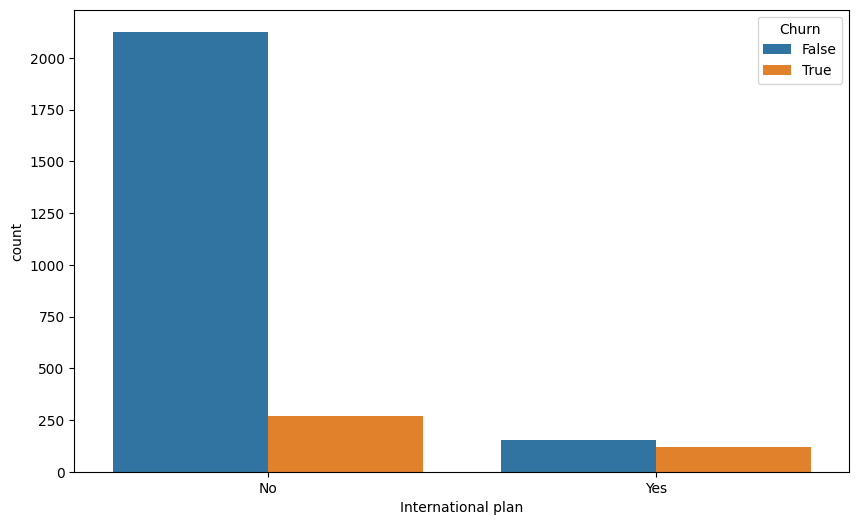

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='International plan',hue='Churn', data=df)
df['International plan'].value_counts()

,count
Voice mail plan,
No,1933
Yes,733


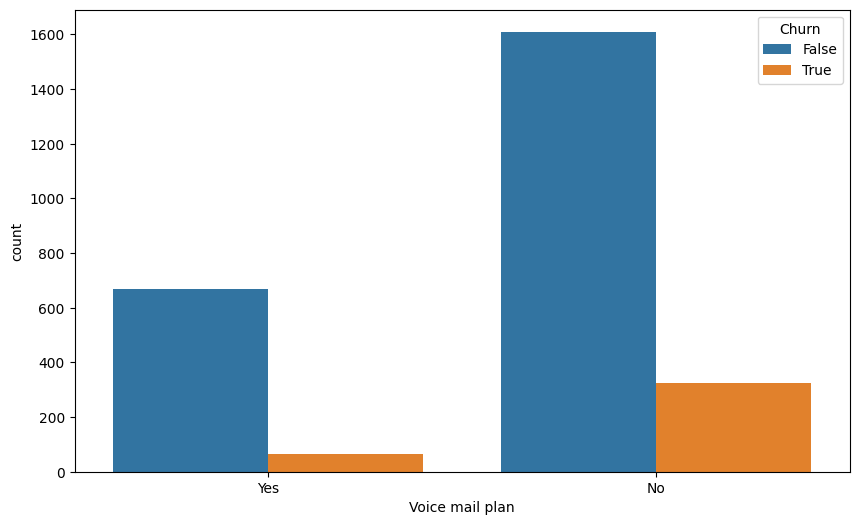

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Voice mail plan',hue='Churn', data=df)
df['Voice mail plan'].value_counts()

# 12.Encoding & change data type

In [13]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    else:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [14]:
df

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,125,0,1,18,265.1,68,45.07,197.4,59,16.78,244.7,48,11.01,10.0,3,2.70,1,0
1,35,104,0,1,19,161.6,81,27.47,195.5,63,16.62,254.4,60,11.45,13.7,3,3.70,1,0
2,31,134,0,0,0,243.4,72,41.38,121.2,70,10.30,162.6,61,7.32,12.2,5,3.29,0,0
3,35,81,1,0,0,299.4,29,50.90,61.9,48,5.26,196.9,46,8.86,6.6,7,1.78,2,0
4,36,72,1,0,0,166.7,71,28.34,148.3,82,12.61,186.9,78,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,76,0,0,0,134.7,56,22.90,189.7,28,16.12,221.4,85,9.96,11.8,5,3.19,2,0
2662,3,186,0,1,29,156.2,35,26.55,215.5,86,18.32,279.1,40,12.56,9.9,6,2.67,2,0
2663,49,65,0,0,0,231.1,15,39.29,153.4,15,13.04,191.3,80,8.61,9.6,4,2.59,3,0
2664,39,25,0,0,0,180.8,67,30.74,288.8,18,24.55,191.9,48,8.64,14.1,6,3.81,2,0


# 13.Separate dataset

In [15]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [16]:
y

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


# 14.Feature Scaling

In [17]:
feature_x= StandardScaler().fit_transform(x)

In [18]:
feature_x

array([[-0.67270017,  0.70157256, -0.33569005, ..., -0.59752673,
        -0.08568137, -0.42917241],
       [ 0.60084425,  0.16502121, -0.33569005, ..., -0.59752673,
         1.24292063, -0.42917241],
       [ 0.33272963,  0.93152313, -0.33569005, ...,  0.21689365,
         0.69819381, -1.19195484],
       ...,
       [ 1.53924539, -0.83143129, -0.33569005, ..., -0.19031654,
        -0.23182759,  1.09639245],
       [ 0.86895886, -1.85343385, -0.33569005, ...,  0.62410384,
         1.38906685,  0.33361002],
       [ 1.07004482, -0.6781309 , -0.33569005, ..., -0.19031654,
         1.24292063, -1.19195484]])

* Scaling feature columns

# 15. Load and Prepare the Dataset

In [19]:
x_train,x_test,y_train,y_test=train_test_split(feature_x,y,test_size=0.35,random_state=42)

In [20]:
x_test

array([[ 0.60084425,  0.36942173,  2.97893841, ...,  1.43852423,
         0.56533361, -0.42917241],
       [ 1.60627404,  1.44252442,  2.97893841, ...,  0.21689365,
        -0.65698023, -1.19195484],
       [-1.54407266, -0.42263026, -0.33569005, ...,  0.21689365,
         0.73805187, -0.42917241],
       ...,
       [ 1.40518808,  0.93152313, -0.33569005, ...,  0.21689365,
         0.31289923, -1.19195484],
       [ 1.47221674, -0.3970802 , -0.33569005, ..., -0.59752673,
         0.16675301, -0.42917241],
       [ 0.46678694,  0.52272211, -0.33569005, ..., -1.00473693,
         0.63176371, -0.42917241]])

## 16.Train a Logistic Regression Model

In [21]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
pred=model.predict(x_test)

In [23]:
pred.shape

(934,)

# 17.Accuracy Score

In [24]:
accuracy_score(y_test,pred)*100

87.04496788008565

# 18. visualizaion confusion Matrix

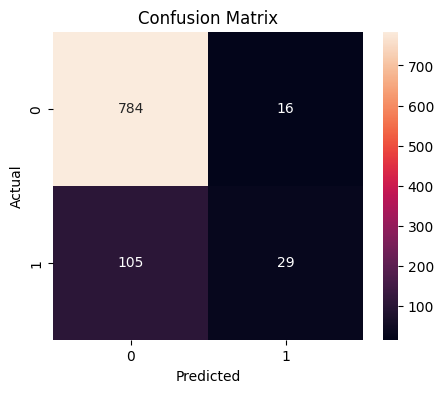

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# 19.Interpret Model Coefficients and Odds Ratios

In [26]:
# Get coefficients
coef = model.coef_[0]
features = x.columns

In [27]:
# Interpret coefficients
odds_ratios = np.exp(coef)

In [28]:
# Display
for feature, coef, odds in zip(features, coef, odds_ratios):
    print(f"{feature}: Coefficient = {coef:.4f}, Odds Ratio = {odds:.4f}")

State: Coefficient = 0.0099, Odds Ratio = 1.0099
Account length: Coefficient = 0.0599, Odds Ratio = 1.0617
International plan: Coefficient = 0.6329, Odds Ratio = 1.8830
Voice mail plan: Coefficient = -0.5452, Odds Ratio = 0.5797
Number vmail messages: Coefficient = 0.1931, Odds Ratio = 1.2130
Total day minutes: Coefficient = 0.3832, Odds Ratio = 1.4670
Total day calls: Coefficient = 0.0995, Odds Ratio = 1.1046
Total day charge: Coefficient = 0.3823, Odds Ratio = 1.4656
Total eve minutes: Coefficient = 0.1590, Odds Ratio = 1.1723
Total eve calls: Coefficient = 0.0086, Odds Ratio = 1.0086
Total eve charge: Coefficient = 0.1579, Odds Ratio = 1.1710
Total night minutes: Coefficient = 0.0725, Odds Ratio = 1.0752
Total night calls: Coefficient = -0.0170, Odds Ratio = 0.9832
Total night charge: Coefficient = 0.0704, Odds Ratio = 1.0730
Total intl minutes: Coefficient = 0.1557, Odds Ratio = 1.1685
Total intl calls: Coefficient = -0.3463, Odds Ratio = 0.7073
Total intl charge: Coefficient = 0.1

# 20.Evaluate the Model

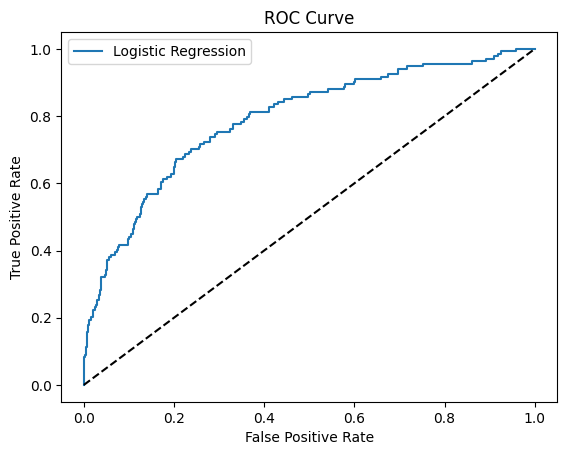

In [29]:
# ROC Curve
y_proba = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 21.Calassification Report

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       800
           1       0.64      0.22      0.32       134

    accuracy                           0.87       934
   macro avg       0.76      0.60      0.63       934
weighted avg       0.85      0.87      0.84       934



In [31]:
# Metrics
print("Accuracy:", accuracy_score(y_test,pred))
print("Precision:", precision_score(y_test,pred))
print("Recall:", recall_score(y_test,pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8704496788008566
Precision: 0.6444444444444445
Recall: 0.21641791044776118
ROC AUC: 0.7901212686567165


**Conclusion**:
In this project, we implemented a logistic regression model using Python and scikit-learn to predict binary outcomes, such as customer churn. After loading and preprocessing the dataset, we trained the model and evaluated its performance using multiple classification metrics.

# Final Thoughts
While logistic regression is simple and interpretable, further improvements can be made using techniques like feature engineering, regularization, or trying more complex models (e.g., decision trees or ensemble methods). Nevertheless, logistic regression remains a strong baseline for binary classification problems.

